<a href="https://colab.research.google.com/github/angelohafner/Python/blob/main/Dimensionamento_de_P%C3%A1ra_raios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionamento de Pára-raios

Existem três métodos de proteção contra descargas atmosféricas definidos pela NBR 5419-3:2015: 

1.   método do ângulo de proteção ou método de Franklin;
2.   método das malhas; e
3.   método da esfera rolante.


## Método da esfera rolante ou eletrogeométrico

Também conhecido como método eletrogeométrico, se baseia na delimitação do volume de proteção dos captores de um Sistema de Proteção contra Descargas Atmosféricas, podendo ser utilizados hastes, cabos ou mesmo uma combinação de ambos. É empregado com muita eficiência em estruturas de formas arquitetônicas complexas. Em função dessa característica, o método
da esfera rolante tem bastante aplicação em ubestação de potência de instalação exterior.

Fundamenta na premissa de uma esfera de raio $R_e$, com o centro localizado na extremidade do líder antes
de seu último salto, conforme visto na Figura. Os pontos da superfície desta esfera são o lugar geométrico que deve ser atingido por uma descarga atmosférica.

A zona protegida é definida como a região em que a esfera rolante não consegue tocar, exceto nos captores.

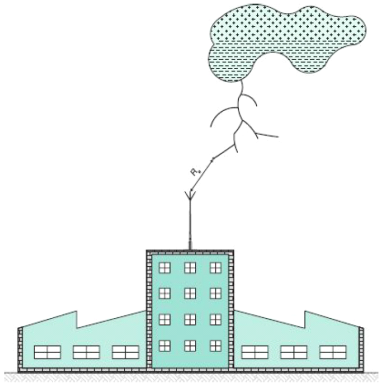

A aplicação do método da esfera rolante envolve dois diferentes casos:
* Volume de proteção de um captor vertical quando a altura do captor $H_c$ é inferior a $R_e$
* Volume de proteção de um captor vertical quando a altura $H_c$ é superior a $R_e$

### Volume de proteção de um captor vertical quando a altura do captor $H_c$ é superior a $R_e$

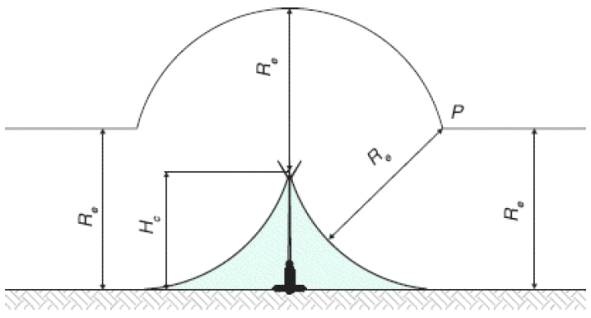

Considerando a origem do nosso sistema de referências carteziano o captor, o raio de proteção fica definido pelo conjunto de pontos fora do alcance do volume da esfera, em termos matemáticos definido por $(1)$:

\begin{equation}
{\left( {x - {R_e}} \right)^2} + {\left( {y - {0}} \right)^2} \ge R_e^2
\tag{1}
\end{equation}

> o ponto $P$ à direita tem coordenadas $(R_e,0)$

O valor de $R_e$ representa a distância entre o ponto de partida do líder ascendente e a extremidade do líder descendente, é o parâmetro utilizado para o projeto do posicionamento dos captores no modelo eletrogeométrico, sendo que se pode calcular essa distância através do valor de crista máximo do primeiro raio negativo, em ${\rm kA}$

\begin{equation}
d = k\,{I^p}
\tag{2}
\end{equation}

Esta equação foi elaborada pelo ${\rm GT 33}$ da ${\rm CIGRE}$  (Conseil International des Grands Réseaux Electriques | Conferência Internacional de Grandes Redes Elétricas de Alta Tensão). 

A ${\rm ABNT \; NBR \, 5419}$ utiliza $k=10$ e $p=0,65$, assim:

\begin{equation}
{R_e} = 10I_{\max }^{0,65}
\tag{3}
\end{equation}

A Equação $(3)$ demonstra que a distância de atração é função da intensidade de $I_{\max}$, de forma que durante a
aproximação do líder descendente, a parte da estrutura que se encontrar a uma distância menor que o raio ${R_e}$ tem maior probabilidade de sofrer o impacto deste.

> Os valores de ${R_e}$ são limitados a $20 \, {\rm m}$ para estruturas com nível de proteção $I$, que é o caso de subestações externas. Verificaremos que esse sempre será o caso.

In [278]:
import numpy as np
import matplotlib.pyplot as plt

In [279]:
# Corrente de crista
I_crista = 4 #kA

# Raio da esfera (metros)
Re = 10*I_crista

# Altura do captor (metros)
Hc = 10

# Domínio de cálculo à direita do captor
x = np.linspace(-1.1*Re, 1.1*Re, 1001)
y = np.linspace( 0,  1.1*Re, 1001)
xx, yy = np.meshgrid(x, y)

Re

40

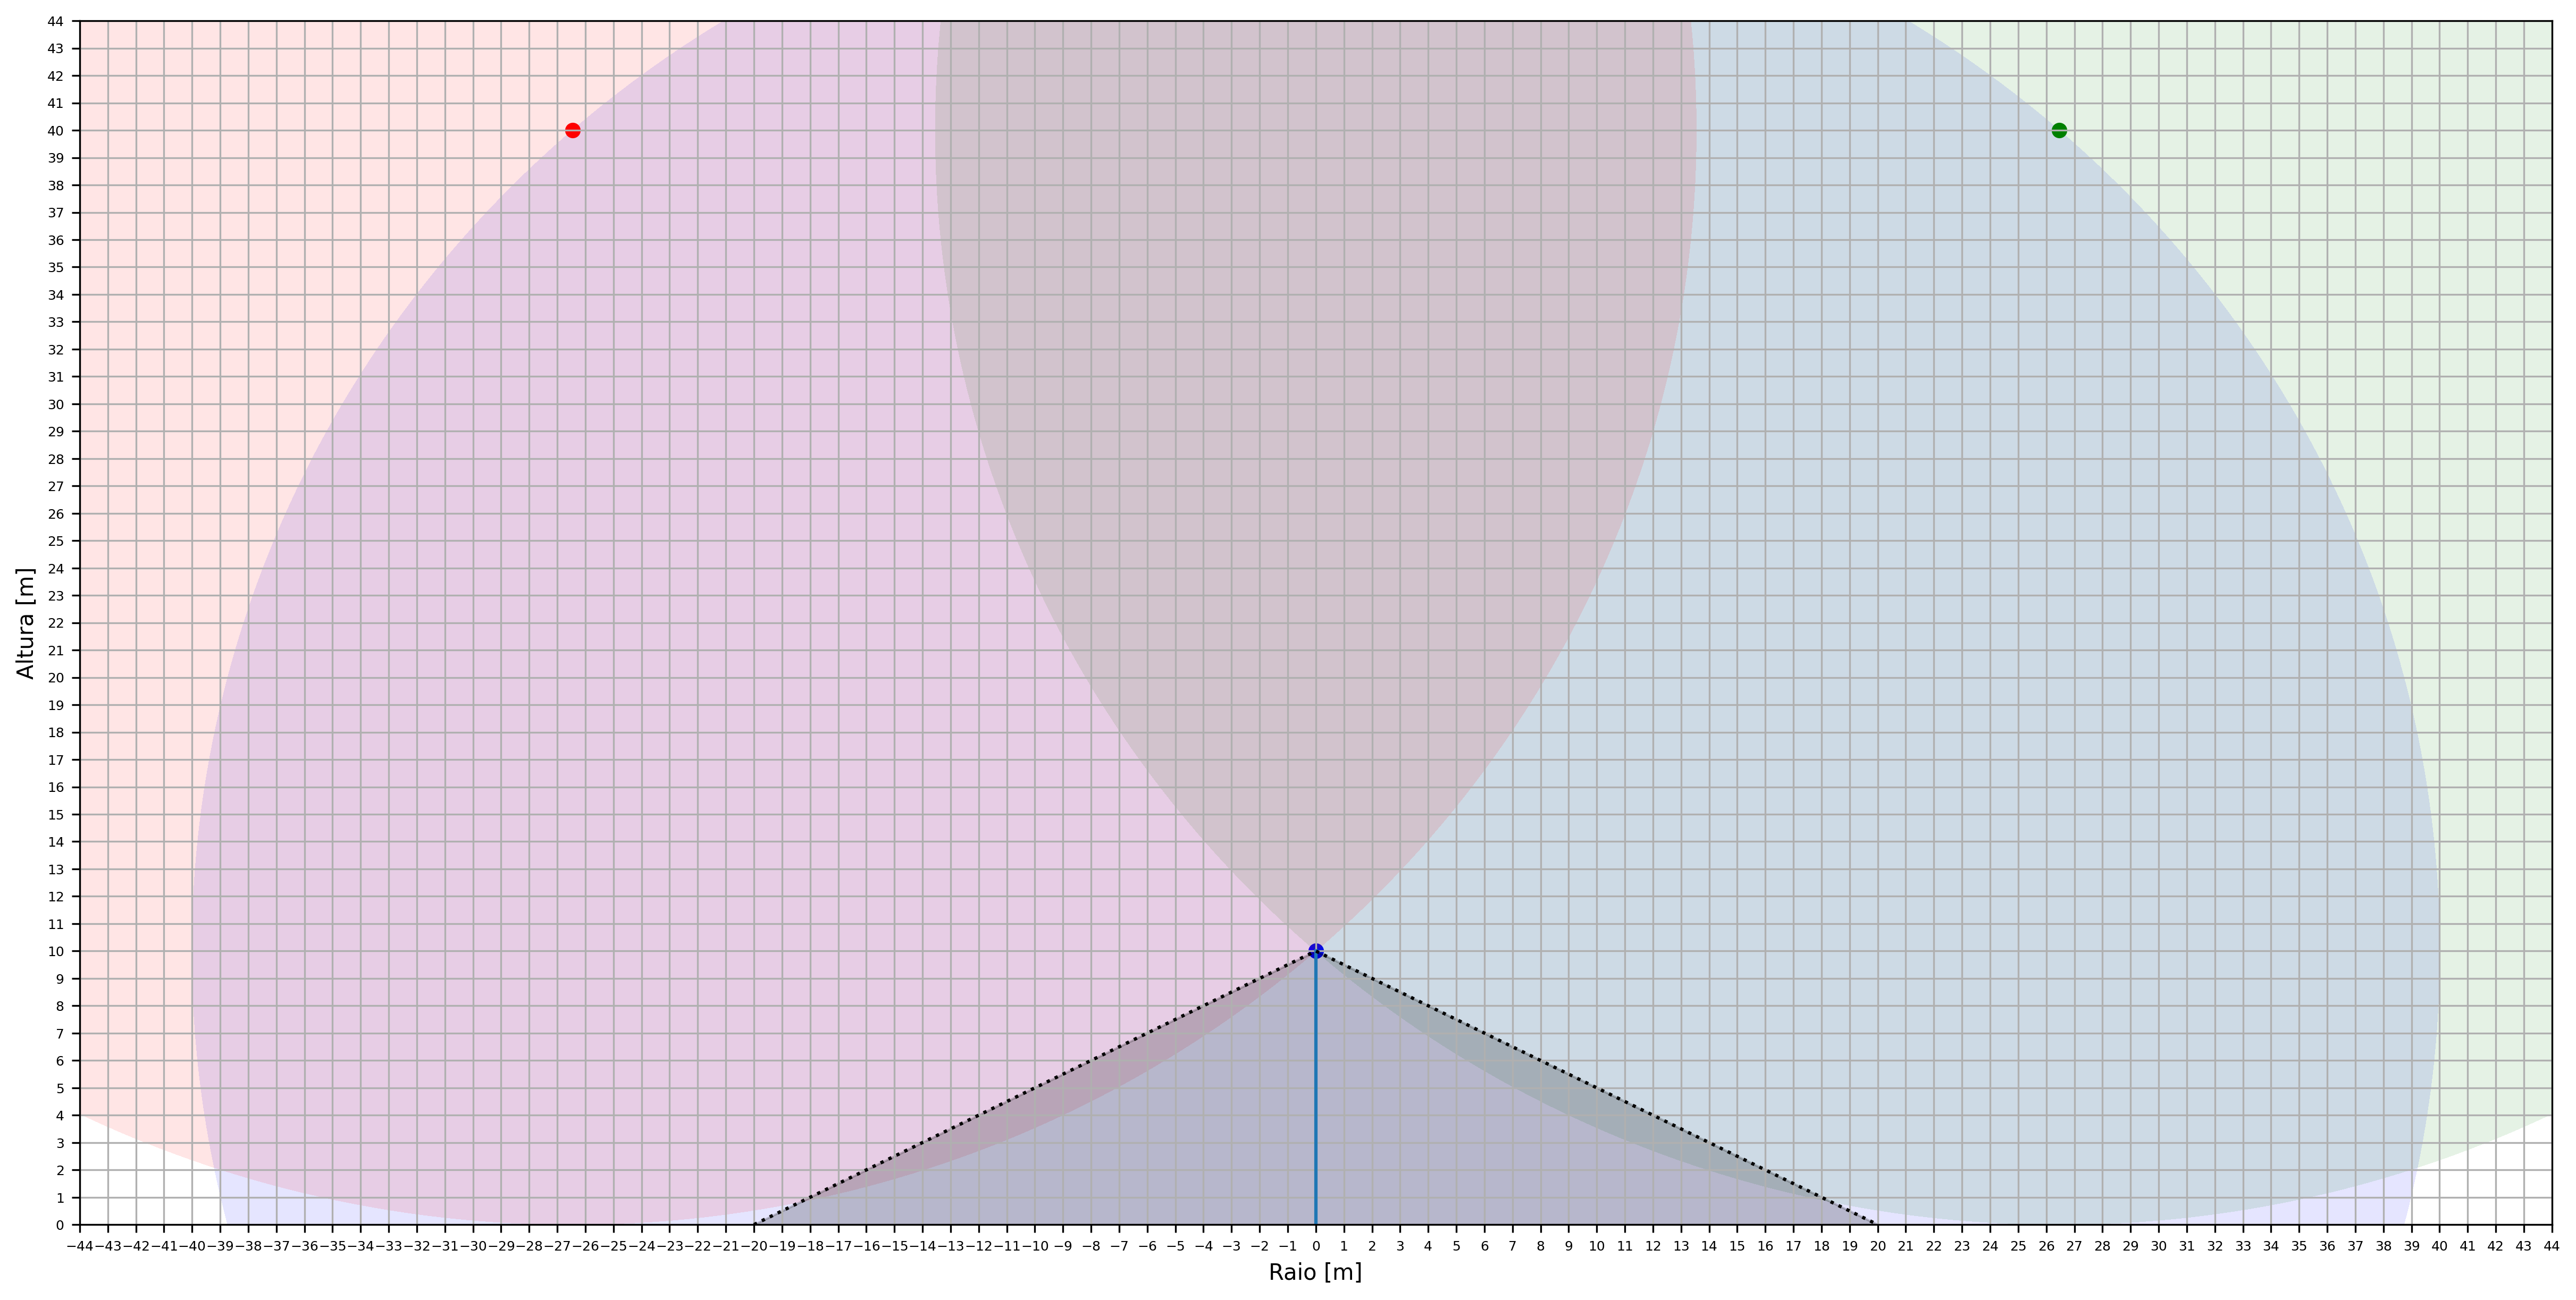

In [280]:
fig, ax = plt.subplots(dpi=300, figsize=(20,10))

# esfera do captor
x0 = 0
y0 = Hc
zz0 = (xx-x0)**2 + (yy-y0)**2
ax.contourf(xx, yy ,zz0, [0, Re**2], linestyles='dashed', colors='blue', alpha=0.1)
plt.scatter(x0, y0, color='blue')

# esfera à direita
x0 = np.sqrt(Re**2 - (Re-Hc)**2)
y0 = Re
zz1 = (xx-x0)**2 + (yy-y0)**2
ax.contourf(xx, yy ,zz1, [0, Re**2], linestyles='dashed', colors='green', alpha=0.1)
plt.scatter(x0, y0, color='green')

# esfera à esquerda
x0 = -np.sqrt(Re**2 - (Re-Hc)**2)
y0 = Re
zz2 = (xx-x0)**2 + (yy-y0)**2
ax.contourf(xx, yy ,zz2, [0, Re**2], linestyles='dashed', colors='red', alpha=0.1)
plt.scatter(x0, y0, color='red')

# captor
y_captor = np.array([0 , Hc])
x_captor = np.array([0 , 0])
plt.plot(x_captor, y_captor)

# limitação de 20 m
x_limitacao = np.array([-20, 0, 20])
y_limitacao = np.array([0, Hc, 0])
plt.plot(x_limitacao, y_limitacao, color='black', ls=':')
plt.fill_between(x_limitacao, y_limitacao, color='black', alpha=0.2)


ax.set_xlabel("Raio [m]")
ax.set_ylabel("Altura [m]")
ax.set_xticks(np.arange(-1.1*Re, 1.11*Re, 1))
ax.set_yticks(np.arange(-0,    1.11*Re,   1))
ax.tick_params(axis='both', which='major', labelsize=6)
ax.grid()
fig.show()